# FAF.FIA16.1 -- Artificial Intelligence Fundamentals

> **Lab 1: FIA \\
> **Performed by:** Gavirlita Ion, group FAF-191 \\
> **Verified by:** Mihail Gavrilita, asist. univ.





## Imports and Utils

In [39]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

class DataLabels:

    NAN1 = "nan1"
    NAN2 = "nan2"
    TOTAL_ROOMS = "totalRooms"
    TOTAL_BEDROOMS = "totalBedrooms"
    COMPLEX_INHABITANTS = "complexInhabitants"
    APARTMENTS_NR = "apartmentsNr"
    MEDIAN_COMPLEX_VALUE = "medianComplexValue"
    NAN8 = "nan8"
    COMPLEX_AGE = "complexAge"
    COLUMNS = [NAN1, NAN2, COMPLEX_AGE,
               TOTAL_ROOMS, TOTAL_BEDROOMS,
               COMPLEX_INHABITANTS, APARTMENTS_NR,
               NAN8, MEDIAN_COMPLEX_VALUE]

def test_model(model_name, model, x_test, y_test):
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    score = model.score(x_test, y_test)

    print_stats(model_name, mse, rmse, score)

def get_test(dataset, pred_target, percents_to_test=0.2):
    x = dataset.drop(pred_target, axis=1)
    y = dataset[pred_target]

    x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                        test_size=percents_to_test,
                                                        random_state=0)
    return x_train, x_test, y_train, y_test

## Task 1 -- Import your data. Analyze it via common statistical approaches. Cleanse the data if necessary

In [40]:
data = np.loadtxt("/home/vanya/Documents/FIA/lab3/apartmentComplexData.txt", delimiter=",")
data = pd.DataFrame(data, columns=DataLabels.COLUMNS)


# clean data of duplicates and None values

data = data.dropna(axis=0)
data = data.drop_duplicates()

# no changes detected to the original data file. this assumes it is already cleaned

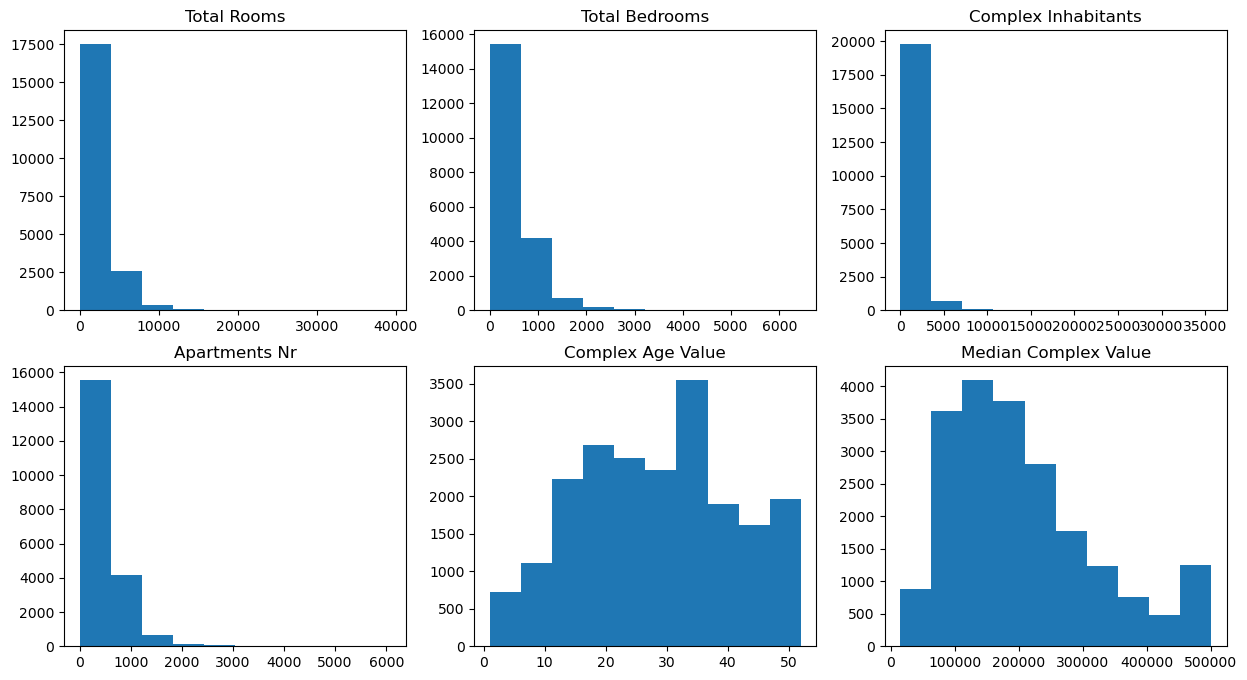

In [41]:
fig, axs = plt.subplots(2, 3, figsize=(15, 8))
axs[0, 0].hist(data[DataLabels.TOTAL_ROOMS])
axs[0, 0].set_title('Total Rooms')
axs[0, 1].hist(data[DataLabels.TOTAL_BEDROOMS])
axs[0, 1].set_title('Total Bedrooms')
axs[0, 2].hist(data[DataLabels.COMPLEX_INHABITANTS])
axs[0, 2].set_title('Complex Inhabitants')
axs[1, 0].hist(data[DataLabels.APARTMENTS_NR])
axs[1, 0].set_title('Apartments Nr')
axs[1, 1].hist(data[DataLabels.COMPLEX_AGE])
axs[1, 1].set_title('Complex Age Value')
axs[1, 2].hist(data[DataLabels.MEDIAN_COMPLEX_VALUE])
axs[1, 2].set_title('Median Complex Value')

plt.show()

## Task 2 -- Train your model by applying linear regression.

In [42]:
# Split the data into training and testing sets
original_data = data

x = data.drop(DataLabels.MEDIAN_COMPLEX_VALUE, axis=1)
y = data[DataLabels.MEDIAN_COMPLEX_VALUE]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create an instance of the LinearRegression class and fit the model to the training data
lr = LinearRegression()
lr.fit(x_train, y_train)

# Predict using the trained model on the test set
y_pred = lr.predict(x_test)

# Evaluate the model using mean squared error
print('Mean squared error: ', mean_squared_error(y_test, y_pred))

Mean squared error:  4918556441.4777775


## Task 3 -- Show the prediction power of your model by attempting to predict the price of a new house. 


In [43]:
predict = lr.predict([[-130, 40.10, 64, 1360, 235, 550, 243, 5.4372]])
print(f"medianComplexValue: { predict[0]:.6f}")

medianComplexValue: 564130.045408


/home/vanya/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## Task 4 -- Re-train your model. Use Ridge, Lasso or Elastic Net regularization

In [45]:
data = original_data

# Split the data into training and testing sets
x = data.drop(DataLabels.MEDIAN_COMPLEX_VALUE, axis=1)
y = data[DataLabels.MEDIAN_COMPLEX_VALUE]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create an instance of the Lasso class and fit the model to the training data
lasso = Lasso(alpha=0.1)
lasso.fit(x_train, y_train)


# Predict using the trained model on the test set
y_pred = lasso.predict(x_test)

# Evaluate the model using mean squared error
print('Mean squared error: ', mean_squared_error(y_test, y_pred))
print(f"medianComplexValue: { y_pred[0]:.6f}")



Mean squared error:  4918556426.13402
medianComplexValue: 55831.210366


## Conclusions:

my head hurts

## Bibliography:

https://www.askpython.com/python/examples/clean-csv-data-python

https://realpython.com/python-data-cleaning-numpy-pandas/

https://www.analyticsvidhya.com/blog/2021/05/all-you-need-to-know-about-your-first-machine-learning-model-linear-regression/#:~:text=of%20Unsupervised%20ML.-,Understanding%20Linear%20Regression,the%20dependent%20and%20independent%20variable.


https://realpython.com/linear-regression-in-python/#simple-linear-regression